## JPL Horizons

In [1]:

from astroquery.jplhorizons import Horizons
from astropy.time import Time


yee


## The main package we're using is [JPL Horizons](https://ssd.jpl.nasa.gov/horizons.cgi).


#### Nasa Id - 0 is barycenter of the solar system (we should define barycenter somewhere) 
-> 1 is Mercury -> 2 is Venus -> 3 is Earth -> 4 is Mars -> 5 is Jupiter -> 6 is Saturn -> 7 is Uranus -> 8 is Neptune -> 9 is Pluto

I haven't found a list of these yet in documentation but it would be helpful to have.

In [14]:
sim_start_date = "2018-01-01"     # simulating a solar system starting from this date
time = Time(sim_start_date).jd
nasaid = 1 # Mercury

mercury = Horizons(id=nasaid, location="@sun", epochs=time).vectors() # fetches the vectors 
mercury


targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate
---,d,---,AU,AU,AU,AU / d,AU / d,AU / d,d,AU,AU / d
str24,float64,str30,float64,float64,float64,float64,float64,float64,float64,float64,float64
Mercury Barycenter (199),2458119.5,A.D. 2018-Jan-01 00:00:00.0000,-0.3877081976897142,-0.007784734354832311,0.03493213520287913,-0.005288319577754868,-0.02691956351394918,-0.001714528471793343,0.002248735741331531,0.3893565239142835,0.005650333891159241


In [18]:

Venus = Horizons(id=2, location="@sun", epochs=time).ephemerides() #ephemerides is a bunch of other data we can fetch
Venus


targetname,datetime_str,datetime_jd,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,IB_elong,IB_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
---,---,d,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg
str22,str24,float64,str1,str1,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,int64,int64,int64,int64,int64,float64,str3,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,float64,float64,float64
Venus Barycenter (299),2018-Jan-01 00:00:00.000,2458119.5,,,276.1601,-24.4246,281.24439,1.35832,237.2192,14.9714,--,--,--,--,--,--,--,--,999,--,-5.767,0.774,100.0,7.7e-08,--,--,22.9453,312.150876,1.620259,312.14422,1.620017,86.39,0.0,354.3062,11.468,275.608,-1.1051,0.727311733442,0.1391888,0.72731173344187,0.1391888,6.04886724,34.8285065,34.8285066,0.0,/*,0.0067,--,--,--,--,--,-0.00794,Sgr,69.183941,275.6079961,-1.1051483,272.76,67.16,8.205049,-5.394508,--,8.177865,--,--,--,--,--,--,--,--,--,--,--,--,144.2343,--,0.0067,275.6047,-1.105


/var/folders/wg/ttcg22kd7hn775xrvbj5blmm0000gn/T/ipykernel_89781/2466962450.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.r    = np.array(r, dtype=np.float)
/var/folders/wg/ttcg22kd7hn775xrvbj5blmm0000gn/T/ipykernel_89781/2466962450.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.v    = np.array(v, dtype=np.float)


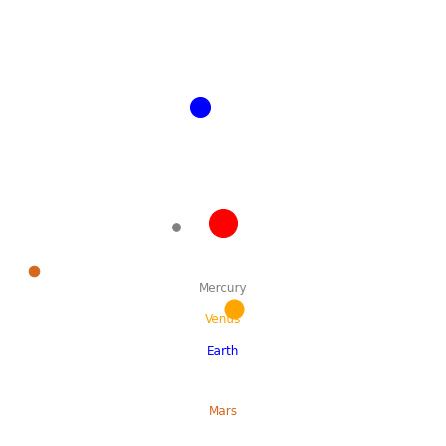

In [13]:
#Code from https://medium.com/analytics-vidhya/simulating-the-solar-system-with-under-100-lines-of-python-code-5c53b3039fc6

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time
from astroquery.jplhorizons import Horizons

sim_start_date = "2018-01-01"     # simulating a solar system starting from this date
sim_duration = 2 * 365                # (int) simulation duration in days
m_earth = 5.9722e24 / 1.98847e30  # Mass of Earth relative to mass of the sun
m_moon = 7.3477e22 / 1.98847e30
 
class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        self.timestamp.set_text('Date: ' + Time(self.time, format='jd', out_subfmt='float').iso)
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.8, 1.8), ylim=(-1.8, 1.8))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun", 28, 'red', [0, 0, 0], [0, 0, 0]))
ss.time = Time(sim_start_date).jd
colors = ['gray', 'orange', 'blue', 'chocolate']
sizes = [0.38, 0.95, 1., 0.53]
names = ['Mercury', 'Venus', 'Earth', 'Mars']
texty = [.47, .73, 1, 1.5]
for i, nasaid in enumerate([1, 2, 3, 4]):  # The 1st, 2nd, 3rd, 4th planet in solar system
    obj = Horizons(id=nasaid, location="@sun", epochs=ss.time, id_type='id').vectors()
    ss.add_planet(Object(nasaid, 20 * sizes[i], colors[i], 
                         [np.double(obj[xi]) for xi in ['x', 'y', 'z']], 
                         [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]))
    ax.text(0, - (texty[i] + 0.1), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')
def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)